In [1]:
import sys
# sys.path.insert(0, '/Users/neelimishra/Dropbox/05_GitHub/flygenvectors/flygenvectors/')
sys.path.insert(0, '/Volumes/dropboxdrive/Dropbox/05_GitHub/flygenvectors/flygenvectors/')

import os
import numpy as np
from glob import glob
import scipy.io as sio
from scipy import sparse, signal

from sklearn.decomposition import PCA, FastICA

import matplotlib.pyplot as plt
from matplotlib import axes, gridspec, colors
import matplotlib.pylab as pl

from scipy.stats import zscore
import data as dataUtils
import plotting

from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import r2_score

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import seaborn as sns
from matplotlib.gridspec import GridSpec
sns.set_style("white")
sns.set_context("talk")

In [2]:
# from regression-v2
exp_date = '2019_07_01'
fly_num = 'fly2'

main_dir = '/Volumes/dropboxdrive/Dropbox/00_AcademicFiles/12_ColumbiaDocumentsG6/02_Thesis/04_Figures/Chapter2/'
#main_dir = '/Users/evan/Dropbox/_AxelLab/_flygenvectors_dataShare/'

data_dict = dataUtils.load_timeseries_simple(exp_date,fly_num,main_dir)

motion_metrics_name = '/Volumes/data1/scratchData/2019_07_01_Nsyb_NLS6s_walk/fly2/_matfiles/run2/motionMetrics_raw_reg.npz'    
motion_metrics_path = glob(motion_metrics_name)[0]
motion_contents = np.load(motion_metrics_path)
cYallRaw = np.squeeze(motion_contents['cYallRaw'])
cYallReg = np.squeeze(motion_contents['cYallReg'])

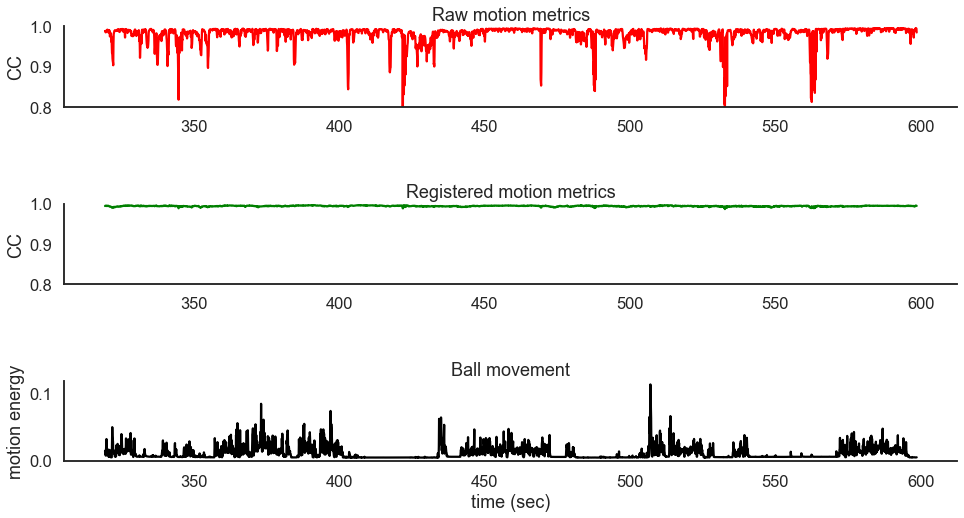

In [3]:
behavior = data_dict['ball']
trial2time = data_dict['time'][np.squeeze(data_dict['trialFlag']==2)]
trial2ball = data_dict['ball'][np.squeeze(data_dict['trialFlag']==2)]

fig = plt.figure(figsize=(16,8))
gs = GridSpec(3,1, height_ratios=[1.,1.,1.],hspace=1.2) #,hspace=[.5,.2,.2,.2]

axes = fig.add_subplot(gs[0])
        #plt.subplot(3,len(cell_ids),j+1)
axes.plot(trial2time,cYallRaw[241:], label='raw metrics', color='red')
# axes.set_xlabel('time (frames)')
axes.set_title('Raw motion metrics')
axes.set_ylim(0.8, 1.0)
axes.set_ylabel('CC')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes = fig.add_subplot(gs[1])
axes.plot(trial2time,cYallReg[241:], label='reg metrics', color='green')
# axes.set_xlabel('time (frames)')
axes.set_title('Registered motion metrics')
axes.set_ylim(0.8, 1.0)
axes.set_ylabel('CC')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
        
axes = fig.add_subplot(gs[2])
axes.plot(trial2time,trial2ball, label='behavior', color='black')
axes.set_xlabel('time (sec)')
axes.set_title('Ball movement')
axes.set_ylabel('motion energy')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)        

plt.show()